# Trabajo Práctico nro 2 - Análisis de datos de Charly

In [1]:
#Eliminamos archivos existentes en el enviroment
rm(list=ls())

#Instalamos los paquetes necesarios y los cargamos
list_of_packages = c( "dplyr", "tibble", "ggplot2", "cowplot", "tidyr", "ggridges", "ggbeeswarm", "GGally",  "plotly", "treemapify", "here",
  "vcd", "colorspace", "corrplot","readxl")
new_packages = list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

suppressWarnings(suppressMessages(invisible(lapply(list_of_packages, library, character.only = TRUE))))


In [2]:
#Leemos el archivo de trabajo resultados.txt
PATH = here('tp 2', 'Datos')
PATH_TP1 = here('tp1', 'Datos')

df_charly= read.delim(file.path(PATH, 'resultado.txt'),
                      header = TRUE
                     )


albums = read_excel(
            path = file.path(PATH_TP1,"albums.xlsx")
                   )

Revisamos el formato de el archivo cargado:

In [3]:
head(df_charly)

name,track_number,disc_number,album_id,album_name,album_artist,id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,uri,analysis_url
Discoshock,1,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,0DIALLPiB2Qo8KvWOnfCDy,0.693,0.484,7,...,0.0514,0.0883,0.008110,0.128,0.787,100.509,225620,4,spotify:track:0DIALLPiB2Qo8KvWOnfCDy,https://api.spotify.com/v1/audio-analysis/0DIALLPiB2Qo8KvWOnfCDy
Toda la gente,2,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,550O6pAkqcrexmFCxko0UG,0.709,0.283,1,...,0.2130,0.3170,0.215000,0.103,0.457,108.668,159451,4,spotify:track:550O6pAkqcrexmFCxko0UG,https://api.spotify.com/v1/audio-analysis/550O6pAkqcrexmFCxko0UG
Judy disfrazada,3,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,3nFV87zAEFcObN47kFJtaC,0.459,0.372,3,...,0.0858,0.2770,0.000173,0.225,0.859,165.432,131056,4,spotify:track:3nFV87zAEFcObN47kFJtaC,https://api.spotify.com/v1/audio-analysis/3nFV87zAEFcObN47kFJtaC
Toma rock and roll,4,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,68a2aTcEQF1evuGm8o4AGQ,0.320,0.888,0,...,0.0933,0.4080,0.893000,0.198,0.107,79.232,148219,4,spotify:track:68a2aTcEQF1evuGm8o4AGQ,https://api.spotify.com/v1/audio-analysis/68a2aTcEQF1evuGm8o4AGQ
¿No te sobra una moneda?,5,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,1QYBbZIUkKd8aiXGuBqTnP,0.403,0.660,2,...,0.0366,0.5590,0.049700,0.777,0.549,135.849,252578,4,spotify:track:1QYBbZIUkKd8aiXGuBqTnP,https://api.spotify.com/v1/audio-analysis/1QYBbZIUkKd8aiXGuBqTnP
Variaciones sobre el paso del elefantito,6,1,4aiJGp6rxbWZapNexjWIvt,Billy Bond and The Jets,Billy Bond and The Jets,2mpmdGyRWWD9aEYGoScBPH,0.752,0.332,2,...,0.1900,0.0772,0.703000,0.123,0.896,116.566,171677,4,spotify:track:2mpmdGyRWWD9aEYGoScBPH,https://api.spotify.com/v1/audio-analysis/2mpmdGyRWWD9aEYGoScBPH


In [4]:
head(albums)

id,name,album_type,artist,categoria
3AFgH2pplBRflUp6D1d1eQ,Random,album,Charly García,estudio_solista
72r2s0nbZeSmPMK30eNrua,"García, el Más Grande",album,Charly García,recop_solista
3Tawntohn1YVK9kYKQXw0H,Cuarenta Obras Fundamentales (Volumen 1),album,Charly García,recop_solista
2wgiKEjz5MaKf0JrmLKC1n,Cuarenta Obras Fundamentales (Volumen 2),album,Charly García,recop_solista
3qPPzWHpuvFT0xHMyDrvS4,Rock And Roll Yo,album,Charly García,estudio_solista
5Rgudh1IKSXYyKDVZuyyQu,Influencia,album,Charly García,estudio_solista


Le agregamos al df_charly la información referida a la categoria de los albums

In [5]:
albums = albums  %>% 
         select(id, categoria)

df_charly = df_charly  %>% 
            merge(albums, by.x = 'album_id', by.y = 'id', all.x = TRUE)  %>% 
            rename(categoria_album = categoria)

El archivo de trabajo importado tiene las filas y columnas correctas:

In [6]:
dim(df_charly)

[1] 578  23

In [7]:
df_charly = df_charly %>% 
            mutate( name = as.factor(name),
                    track_number = as.factor(track_number) ,
                    disc_number = as.factor(disc_number) ,
                    album_id = as.factor(album_id),
                    album_name = as.factor(album_name),
                    album_artist = as.factor(album_artist),
                    id = as.factor(id)
                  )

summary(df_charly[5:19])

                                    album_name 
 Cuarenta Obras Fundamentales (Volumen 1): 20  
 Cuarenta Obras Fundamentales (Volumen 2): 20  
 La Hija De La Lagrima                   : 20  
 Obras Cumbres                           : 20  
 Seru Giran (En Vivo)                    : 20  
 Si - Detrás De Las Paredes              : 20  
 (Other)                                 :458  
                      album_artist                      id     
 Billy Bond and The Jets    :  9   00eLH9fugX16wYKJJv1WvR:  1  
 Charly García              :280   00QmsoTV1zSUuPyp7BcbUK:  1  
 La Máquina de Hacer Pájaros: 15   01Y5NXtQsIZTdc7sJ4qkt4:  1  
 PorSuiGieco                : 12   021xwVNl5p8dxIcivUea1n:  1  
 Serú Girán                 :122   028VrT2CVQSB4YNSeq8Zjh:  1  
 Sui Generis                :140   02BohgU7lQQmnToFSMcF6p:  1  
                                   (Other)               :572  
  danceability        energy            key            loudness      
 Min.   :0.0990   Min.   :0.0040  

Borramos aquellas columnas del df que no vamos a utilizar para el análisis ya que no brindan información relevante.

In [8]:
df_charly = df_charly %>% 
            select(-album_id, -id, -uri, -analysis_url)

## Tablas de frecuencias marginales

### Frecuencias marginales por album

In [9]:
frecuencia_album_name = df_charly %>% 
                      select(album_name) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Album_Name' = '.' )

head(frecuencia_album_name[order(frecuencia_album_name$Freq, decreasing = T),])

,Album_Name,Freq
9,Cuarenta Obras Fundamentales (Volumen 1),20
10,Cuarenta Obras Fundamentales (Volumen 2),20
19,La Hija De La Lagrima,20
22,Obras Cumbres,20
35,Seru Giran (En Vivo),20
37,Si - Detrás De Las Paredes,20


### Frecuencias marginales por categoria

In [10]:
frecuencia_categoria = df_charly %>% 
                      select(categoria_album) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Categoria' = '.' )

head(frecuencia_categoria[order(frecuencia_categoria$Freq, decreasing = T),])

,Categoria,Freq
6,estudio_solista,149
10,recop_solista,69
7,estudio_suigeneris,51
11,recop_suigeneris,50
9,recop_serugiran,49
5,estudio_serugiran,47


### Frecuencias marginales por artista

In [11]:
frecuencia_album_artist = df_charly %>% 
                      select(album_artist) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      rename('Album_Artist' = '.' )

frecuencia_album_artist[order(frecuencia_album_artist$Freq, decreasing = T),]

,Album_Artist,Freq
2,Charly García,280
6,Sui Generis,140
5,Serú Girán,122
3,La Máquina de Hacer Pájaros,15
4,PorSuiGieco,12
1,Billy Bond and The Jets,9


## Tablas de frecuencias conjuntas

In [12]:
frecuencia_conjuntas = df_charly %>% 
                      select(categoria_album, album_name, album_artist) %>% 
                      table() %>% 
                      as.data.frame() %>% 
                      filter(Freq != 0)

head(frecuencia_conjuntas[order(frecuencia_conjuntas$album_artist, decreasing = T),])

,categoria_album,album_name,album_artist,Freq
35,vivo_suigeneris,Adios Sui Generis Vol III,Sui Generis,6
36,vivo_suigeneris,Adios Sui Generis Vol. II,Sui Generis,5
37,vivo_suigeneris,Adiós Sui Generis Vol.I,Sui Generis,8
38,estudio_suigeneris,Confesiones De Invierno,Sui Generis,10
39,recop_suigeneris,Obras Cumbres,Sui Generis,20
40,estudio_suigeneris,Pequenas Anécdotas Sobre Las Instituciones,Sui Generis,11


## Trabajo de archivos y selección de variables

Para poder seleccionar las variables a utilizar, vamos a realizar una matriz de correlaciones entre nuestras variables numéricas para poder entender mejor nuestos datos:

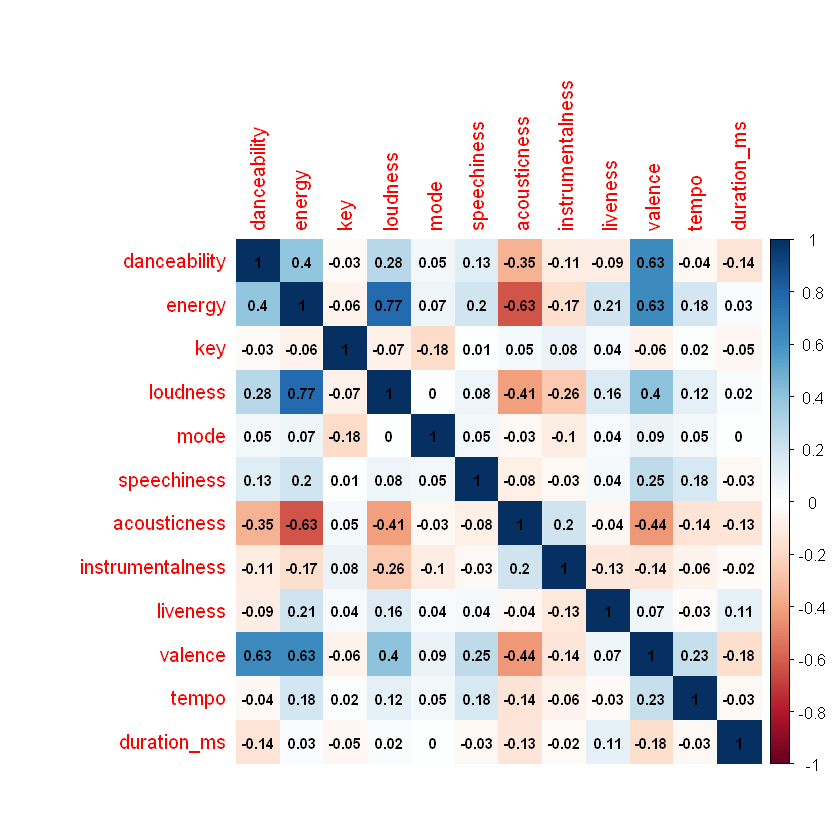

In [13]:
cor.matrix = cor(df_charly[6:17])

corrplot(cor.matrix,
        method = 'color',
       addCoef.col="black",
         number.cex=0.75
        )

En este corrplot podemos ver el nivel de acústica tiene una correlacion negativa con la energía. 
Ademas la positividad esta correlacionada con la energía y la bailabilidad. La energia tambien se comportan de manera similar al volumen, o estan altamente correlacionadas. 
En base a esto seleccionamos la energía, el nivel de acústica, la bailabilidad y duracion en ms.

Ahora vamos a incorporar un archivo descargado desde Spotify que contiene las 99 mejores canciones de Charly. Intentaremos joinearlo con nuestro df_charly (resultado.txt) para incorporar una variable categórica adicional que nos marque si esa canción puntual es parte del top100. Este es un resumen de nuestro archivo:

In [14]:
cien_mejores =  read_excel(file.path(PATH,"100 mejores.xlsx")) 

cien_mejores = cien_mejores  %>% 
                select (-Artist,-Album,-"Date Added") %>% 
                rename(name = Track) %>% 
                mutate( name = as.factor(name),
                        Top_cien = "SI")

df_charly = merge(x = cien_mejores, 
                  y = df_charly, 
                  by = "name",
                  all.x= FALSE,
                  all.y = TRUE
                 )  %>% 
            mutate(Top_cien = case_when( is.na(Top_cien) ~ 'NO',
                                        TRUE ~ 'SI'
                                       )
                  )

head(cien_mejores)

name,Top_cien
Inconsciente Colectivo,SI
Los Dinosaurios,SI
Yendo De La Cama Al Living - Remastered Version,SI
Canción para Mi Muerte,SI
Desarma Y Sangra - Live,SI
Nos Siguen Pegando Abajo,SI


In [15]:
#Validamos el archivo que tiene las canciones descargadas de spotify

lista_de_canciones = distinct(tibble::as_tibble((df_charly$name))) 
lista_de_canciones = lista_de_canciones  %>% 
                            merge(cien_mejores, 
                          by.x = "value",
                          by.y = 'name',
                          all.x= TRUE,
                          all.y = FALSE
                         )  %>% 
                         mutate(Top_cien = case_when( is.na(Top_cien) ~ 'NO',
                                                  TRUE ~ 'SI'
                                                 )
                                )

lista_de_canciones_si = lista_de_canciones  %>% 
                        filter(Top_cien == 'SI')


top_cien_no_encontradas = cien_mejores %>%
                         select(-Top_cien)  %>% 
                          merge(lista_de_canciones_si,
                                 by.y = "value",
                                  by.x = 'name',
                                  all.x= TRUE,
                                  all.y = FALSE)  %>% 
                         filter(is.na(Top_cien))  %>%  
                         select(-Top_cien)

Vemos ahora si hay canciones de las 99 mejores que por diferencias en su clave (nombre) no las hemos podido encontrar en nuestro archivo df_charly.

In [16]:
lista_de_canciones_si = lista_de_canciones  %>% 
                        filter(Top_cien == 'SI')


top_cien_no_encontradas = cien_mejores %>%
                         select(-Top_cien)  %>% 
                          merge(lista_de_canciones_si,
                                 by.y = "value",
                                  by.x = 'name',
                                  all.x= TRUE,
                                  all.y = FALSE)  %>% 
                         filter(is.na(Top_cien))  %>%  
                         select(-Top_cien)

 top_cien_no_encontradas                           

name
Canción De Alicia En El País - Live
Canción De Dos Por Tres - Remastered Version
Desarma Y Sangra - Live
Eiti Leda
No Bombardeen Buenos Aires - Remastered Version
"No Llores Por Mí, Argentina - Live"
No Te Sobra Una Moneda?
Pasajera en Trance
Superhéroes - Remastered Version
Yendo De La Cama Al Living - Remastered Version


Tenemos entonces estas 11 que las dejaremos de lado y seguiremos trabajando entonces con el top 88. 

Lo que haremos ahora es tomar la variable liveness y la discretizamos en 0 o 1. LLevaremos a 1 aquellas que tengan un valor mayor a 0.5 y a 0 a aquellas que tengan un valor menor o igual que 0.5. 

In [17]:
df_charly = df_charly  %>% 
            mutate(liveness_dis = case_when( liveness > 0.5 ~ 1,
                                             liveness <= 0.5 ~ 0
                                            ),
                   liveness_dis = as.factor(liveness_dis)
                  ) 

Analizamos nuestras variabes categóricas para entender si necesitariamos agruparlas o nos servirán así como están:

In [18]:
table(df_charly$categoria_album)

table(df_charly$liveness_dis)



    estudio_billybondandthejets estudio_lamaquinadehacerpajaros 
                              9                              15 
             estudio_pedroaznar             estudio_porsuigieco 
                             13                              12 
              estudio_serugiran                 estudio_solista 
                             47                             149 
             estudio_suigeneris               otros_bandasonora 
                             51                               7 
                recop_serugiran                   recop_solista 
                             49                              69 
               recop_suigeneris                     vivo_amigos 
                             50                              13 
                 vivo_serugiran                    vivo_solista 
                             40                              15 
                vivo_suigeneris 
                             39 


  0   1 
477 101 

Viendo esto decidimos agrupar un poco mas la variable cateogria_album quedandonos solamente con estudio, vivo, otros y recop.

In [19]:
df_charly = df_charly  %>% 
             separate(categoria_album, c("categoria_album_a", "borrar"), "_")  %>% 
            select(-borrar)


Echamos un rapido vistazo a las variables con las que nos hemos quedado:

In [22]:
df_charly = df_charly  %>%  
            select(name, Top_cien, categoria_album_a,  album_name, album_artist, liveness_dis, energy, acousticness, duration_ms, valence)
head(df_charly)

name,Top_cien,categoria_album_a,album_name,album_artist,liveness_dis,energy,acousticness,duration_ms,valence
A Punto De Caer,SI,estudio,Como Conseguir Chicas,Charly García,0,0.187,0.0897,183373,0.1660
Ah Te Vi Entre Las Luces,SI,estudio,La Máquina De Hacer Pájaros,La Máquina de Hacer Pájaros,0,0.348,0.0116,670507,0.0667
Alguien en el Mundo Piensa en Mí,SI,estudio,Say No More,Charly García,0,0.714,0.1690,267240,0.4160
Anhedonia,SI,recop,"García, el Más Grande",Charly García,1,0.518,0.0488,263200,0.3320
Anhedonia,SI,estudio,Como Conseguir Chicas,Charly García,1,0.366,0.0376,263200,0.3460
Aprendizaje,SI,recop,Sí o Sí - Diario del Rock Argentino - Sui Generis,Sui Generis,0,0.236,0.5930,222387,0.1310


## Visualizaciones

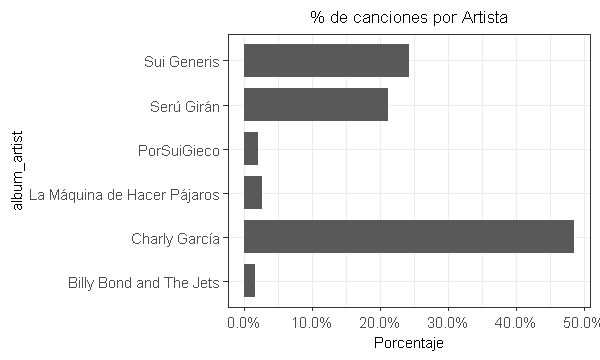

In [23]:
# Con frecuencias relativas
options(repr.plot.width=5, repr.plot.height=3)

theme_set(theme_bw())

ggplot(df_charly) + 
  aes(x = album_artist, y = ..count.. / sum(..count..)) + 
  geom_bar(width = 0.75) + 
  coord_flip() + 
 scale_y_continuous("Porcentaje", labels = scales::percent) +
   ggtitle("% de canciones por Artista") + 
  theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5)) 

Aquí vemos que casi el 50% de canciones de charly son como solista. Dentro de sus bandas, Sui Generis y Serú Giran son las dos con mas canciones. Analizamos ahora que artistas han tenido mayor impacto, viendo la cantidad de canciones exitosas (forman parte del top 88).

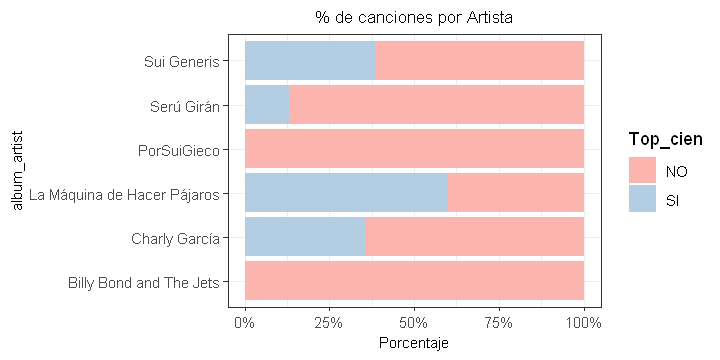

In [24]:
# Con frecuencias relativas
options(repr.plot.width=6, repr.plot.height=3)

theme_set(theme_bw())

ggplot(df_charly) + 
  aes(x = album_artist, fill = Top_cien ) + 
  geom_bar(position = 'fill') + 
  coord_flip() + 
 scale_y_continuous("Porcentaje", labels = scales::percent) +
   ggtitle("% de canciones por Artista", ) + 
  theme(axis.title.x = element_text(size = 9),
        axis.title.y = element_text(size = 9),
        plot.title = element_text(size = 10, hjust = 0.5))+
scale_fill_brewer(palette = "Pastel1")

Aquí lo que vemos por banda del total de canciones cuantos exitos tuvieron. Esto nos permite entender cuales bandas tuvieron mejor reconocimiento teniendo en cuenta la cantidad de canciones total.

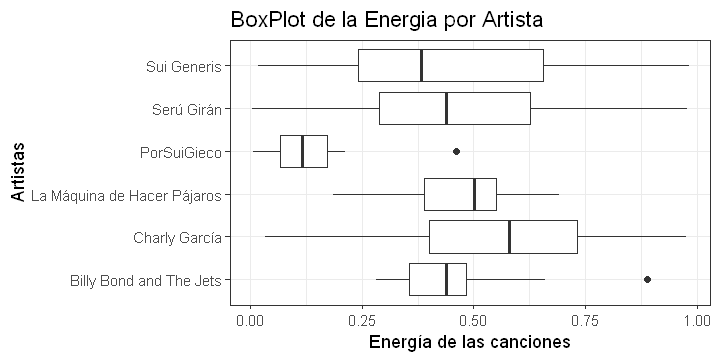

In [25]:
ggplot(df_charly) +
  aes(x = energy, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Energía de las canciones", y = "Artistas")  +
scale_fill_brewer(palette = "Pastel1") + 
 ggtitle("BoxPlot de la Energia por Artista" )  

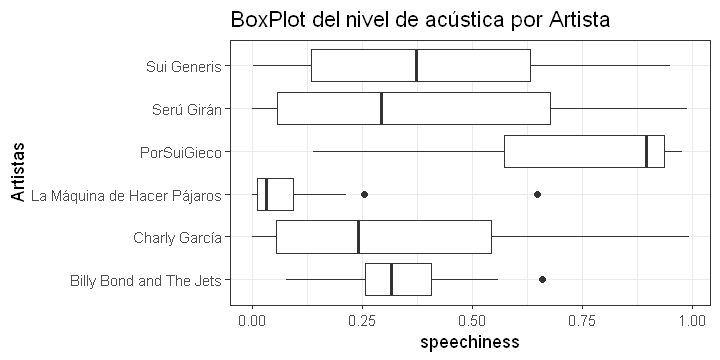

In [26]:
ggplot(df_charly) +
  aes(x = acousticness, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "speechiness", y = "Artistas")  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot del nivel de acústica por Artista" )  

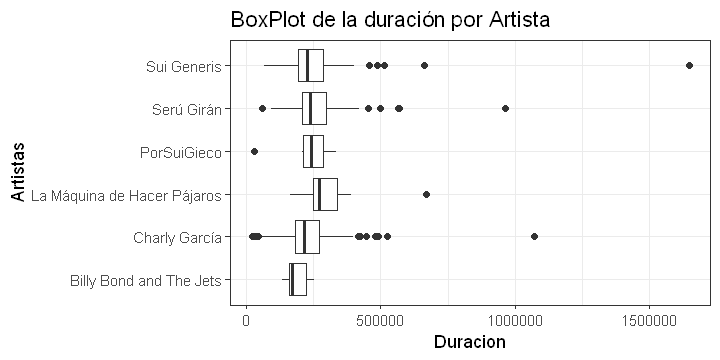

In [27]:
ggplot(df_charly) +
  aes(x = duration_ms, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Duracion", y = "Artistas")  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot de la duración por Artista" )

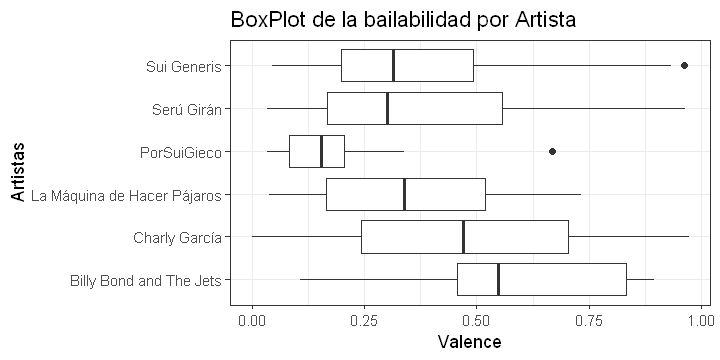

In [28]:
ggplot(df_charly) +
  aes(x = valence, y = album_artist) +
  geom_boxplot(show.legend = F) +
  labs(x = "Valence", y = "Artistas")  +
scale_fill_brewer(palette = "Pastel1") +
 ggtitle("BoxPlot de la bailabilidad por Artista" )

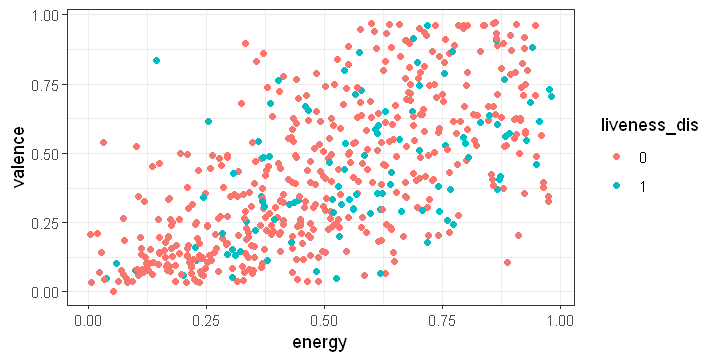

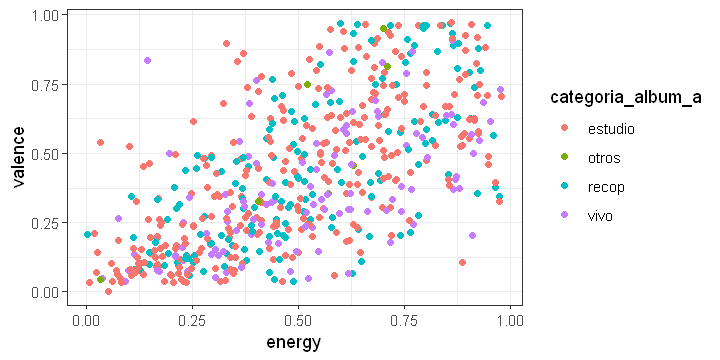

In [29]:
ggplot(df_charly) +
  aes(x = energy, y = valence ,color = liveness_dis) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")

ggplot(df_charly) +
  aes(x = energy, y = valence ,color = categoria_album_a) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")

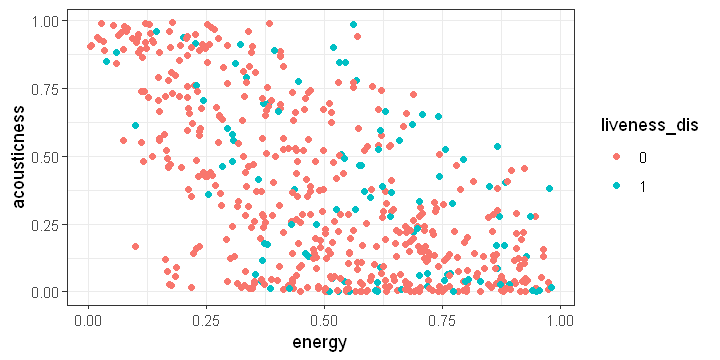

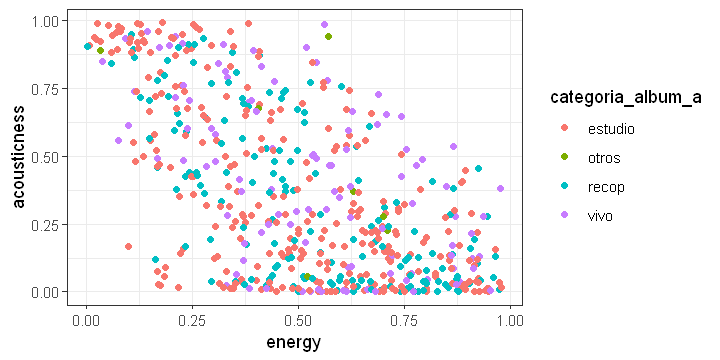

In [30]:
ggplot(df_charly) +
  aes(x = energy, y = acousticness, color = liveness_dis) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")

ggplot(df_charly) +
  aes(x = energy, y = acousticness ,color = categoria_album_a) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")

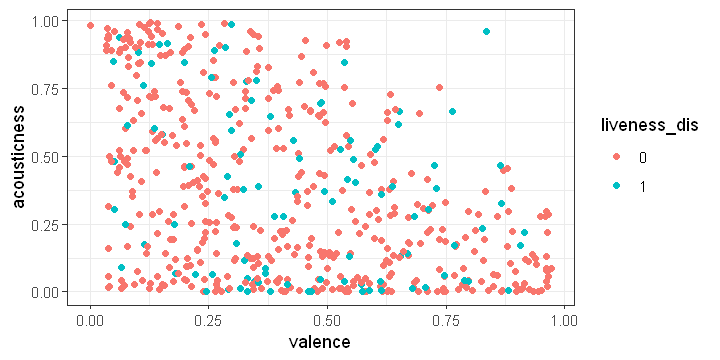

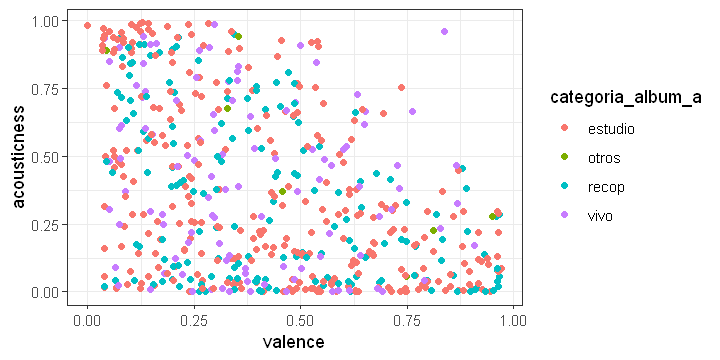

In [31]:
ggplot(df_charly) +
  aes(x = valence, y = acousticness, color = liveness_dis) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")

ggplot(df_charly) +
  aes(x = valence, y = acousticness ,color = categoria_album_a) +
  geom_point() +
scale_fill_brewer(palette = "Pastel1")